# Spam Email Detection

dataset from Kaggle https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset

In [42]:
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [43]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [44]:
df = pd.read_csv('dataset/combined_data.csv')
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


label 0 = legitimate, label 1 = spam

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [46]:
df.isnull().sum()

label    0
text     0
dtype: int64

## Preprocess Data

In [47]:
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
stopword = stopwords.words('english')

In [48]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    clean_text = [
        lemmatizer.lemmatize(stemmer.stem(word))
        for word in tokens
        if word.isalpha() and word not in stopword
    ]
    return " ".join(clean_text)

In [49]:
df['clean_text'] = df['text'].apply(preprocess_text)
df.head()

,label,text,clean_text
0,1,ounce feather bowl hummingbird opec moment ala...,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get your medircations online qnb ikud v...,wulvob get medirc onlin qnb ikud viagra escape...
2,0,computer connection from cnn com wednesday es...,comput connect cnn com wednesday escapenumb ma...
3,1,university degree obtain a prosperous future m...,univers degre obtain prosper futur money earn ...
4,0,thanks for all your answers guys i know i shou...,thank answer guy know check rsync manual would...


## Model - Naive Bayes()

In [50]:
x_train, x_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.3, random_state=42)

In [51]:
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [52]:
model = MultinomialNB()
model.fit(x_train_vec, y_train)

MultinomialNB()

## Evaluation

In [53]:
y_pred = model.predict(x_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

97.57539444777312


In [54]:
classification = classification_report(y_test, y_pred, target_names=["0", "1"])
print(classification)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11818
           1       0.99      0.97      0.98     13217

    accuracy                           0.98     25035
   macro avg       0.98      0.98      0.98     25035
weighted avg       0.98      0.98      0.98     25035



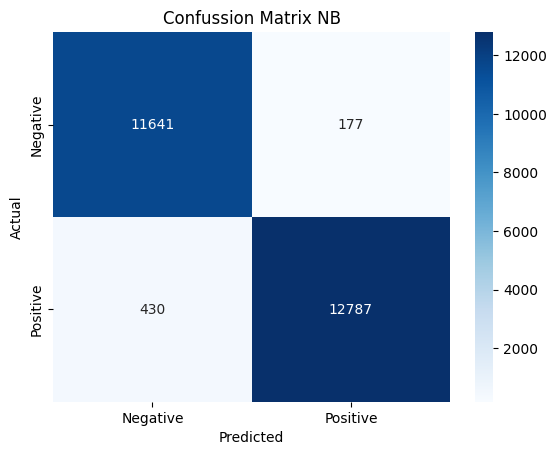

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix NB')
plt.show()

## Words that Indicated Spam or Ham

In [57]:
import numpy as np

feature_names = np.array(vectorizer.get_feature_names_out())
class_label =  model.classes_

In [58]:
log_prob = model.feature_log_prob_

In [60]:
spam_word = log_prob[1].argsort()[::-1]
top_n = 10

In [64]:
print('Word indicaed as SPAM')
for i, idx in enumerate(spam_word[:top_n]):
    print(f'{i+1}. {feature_names[idx]} = {log_prob[1][idx]:.2f}')

Word indicaed as SPAM
1. escapenumb = -4.74
2. escapelong = -5.77
3. price = -6.32
4. com = -6.41
5. http = -6.43
6. product = -6.74
7. offer = -6.88
8. qualiti = -6.93
9. one = -6.94
10. day = -6.94
